# PyMarthe, le tuto d'intro 

## Introduction

*PyMarthe* est une interface Python pour le logiciel de simulation des écoulements *Marthe*. *PyMarthe* complète l'interface graphique WinMarthe en offrant la possibilité d'écrire les paramètres, de lire les sorties, et d'exécuter un modèle existant depuis un terminal Python. 

*PyMarthe* permet d'effectuer des tâches répétitives, et aussi (et surtout) de profiter de la puissance de la suite logiciel __[PEST](http://www.pesthomepage.org)__ pour l'estimation des paramètres, la quantification des incertitudes, et l'optimisation. 

Dans la version actuelle, *PyMarthe* permet de gérer tous les paramètres distribués (permh, kepon, emmli, emmca) pour les maillages réguliers.

Détail qui a son importance, Python est en base 0, et PyMarthe aussi. L'identifiant de la première couche est ainsi 0, de la deuxième couche, 1 , etc. En revanche, pour garder la cohérence avec Marthe, tous les fichiers et noms de fichiers écrits par PyMarthe sont en base 1. 

## Chargement d'un modèle Marthe

*PyMarthe* dépend des modules Python __[numpy](https://pypi.org/project/numpy/)__, __[pandas](https://pypi.org/project/pandas/)__ et __[pyemu](https://pypi.org/project/pyemu/)__. Ces derniers sont facilement installables via la commande <code>pip install</code>.

In [1]:
import sys 
import os 
import pandas as pd
import numpy as np
import pyemu
from matplotlib import pyplot as plt

import pymarthe

Pour charger un modèle existant (développé par exemple avec WinMarthe), rien de plus simple ! Il suffit de se placer dans le répertoire du modèle avec ``os.chdir(path)`` et de pointer vers le fichier *Marthe* ``model.rma``: 

In [2]:
os.chdir('/Users/apryet/recherche/adeqwat/model/')
mm = pymarthe.MartheModel('mona.rma')

<code>mm</code> est une instance de la classe ``MartheModel``, c'est la porte d'entrée Python vers le modèle *Marthe*. Lors de l'initialisation, *PyMarthe* lit le fichier ``mona.permh``, qui lui permet de connaître les coordonnées, le maillage, et le domaine active du modèle. 

Il est possible de récupérer les dimensions du modèle :

nlay, nrow, ncol = mm.nlay, mm.nrow, mm.ncol

Et d'accéder au tableau  ``imask`` dans lequel on retrouvera la valeur 1 pour les cellules actives, 0 pour les cellules inactives. Par exemple, pour afficher le domaine actif de la première couche : 

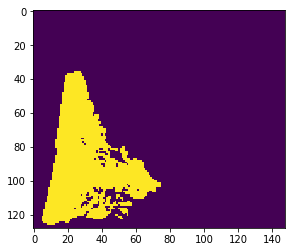

In [3]:
plt.imshow(mm.imask[0,:,:])

La conductivité hydraulique horizontale ``permh`` est automatiquement chargée. Pour les autres, on peut utiliser la fonction ``load_grid()``, et l'on retrouvera le paramètre dans le dictionnaire des grilles chargées dans *PyMarthe* : 

In [4]:
mm.load_grid('kepon')
mm.grids.keys()

dict_keys(['permh', 'kepon'])

PyMarthe sait lire et écrire les paramètres, il est possible (mais déconseillé) de changer directement la valeur de cette grille et de l'écrire sur le disque : 

In [5]:
mm.grids['permh'][2,50:100,30:24]=2e-5
mm.write_grid('permh')

Premièrement ce n'est pas bien pratique, deuxièmement cela comporte des dangers, notamment celui d'altérer le domaine actif du modèle (valeurs de permh non nulles). Une solution à cela  ? Utiliser la classe ``MartheParam``...

## Utilisation des paramètres

Pour lire ou ré-ecrire un paramètre, on fait appel à la classe ``MartheParam``.

In [6]:
# ajout du paramètre de conductivité hydraulique horizontale
mm.add_param('permh')
# ajout du paramètre d'emmagasinnement captif'
mm.add_param('emmli')
# accès au dictionnaire pour atteindre les paramètres 
mm.param

{'permh': <pymarthe.mparam.MartheParam at 0x11cb4a6d8>,
 'emmli': <pymarthe.mparam.MartheParam at 0x11cb512b0>}

Il est alors beaucoup plus simple et prudent de changer les valeurs des paramètres : 

In [7]:
# changer toutes les valeurs 
mm.param['permh'].set_array(value = 1e-3)

# changer la valeur d'une seule couche 
mm.param['permh'].set_array(value = 1e-3,lay = 2)

# changer la valeur d'une série de couches 
mm.param['permh'].set_array(value = 1e-3, lay = [2,3,4])

# puis écriture vers le disque 
mm.write_grids()

## Utilisation des observations 